<a href="https://www.kaggle.com/code/manichandana9390/coffee-review?scriptVersionId=146821951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv
/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv


In [2]:
train = pd.read_csv('/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv')
test = pd.read_csv('/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv')

In [3]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [4]:
train.head()


,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


**Shape of Data**

In [5]:
train.shape


(2095, 12)

**Size of Data**

In [6]:
train.size

25140

**Attributes**

In [7]:
train.columns

Index(['name', 'roaster', 'roast', 'loc_country', 'origin_1', 'origin_2',
       '100g_USD', 'rating', 'review_date', 'desc_1', 'desc_2', 'desc_3'],
      dtype='object')

/tmp/ipykernel_20/2540906299.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(train.corr(), annot=True)


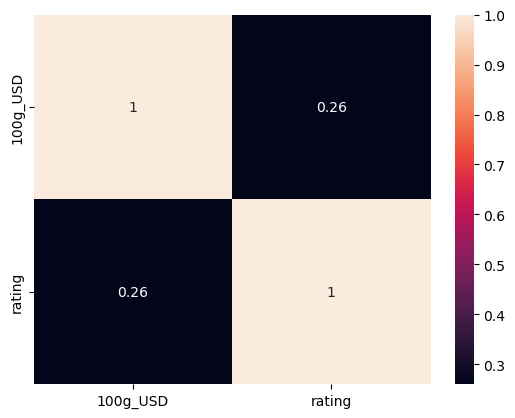

In [8]:
import seaborn as sns

#plotting the heatmap for correlation
ax = sns.heatmap(train.corr(), annot=True)

**Properties**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


In [10]:
train.describe()

,100g_USD,rating
count,2095.000000,2095.000000
mean,9.323313,93.114081
std,11.430659,1.563024
min,0.120000,84.000000
25%,4.930000,92.000000
50%,5.860000,93.000000
75%,8.785000,94.000000
max,132.280000,98.000000


In [11]:
train['rating'].value_counts()

93    611
94    530
92    377
95    260
91    114
90     91
96     66
97     11
88     10
89      8
87      7
86      5
84      2
98      2
85      1
Name: rating, dtype: int64

**Word Cloud**

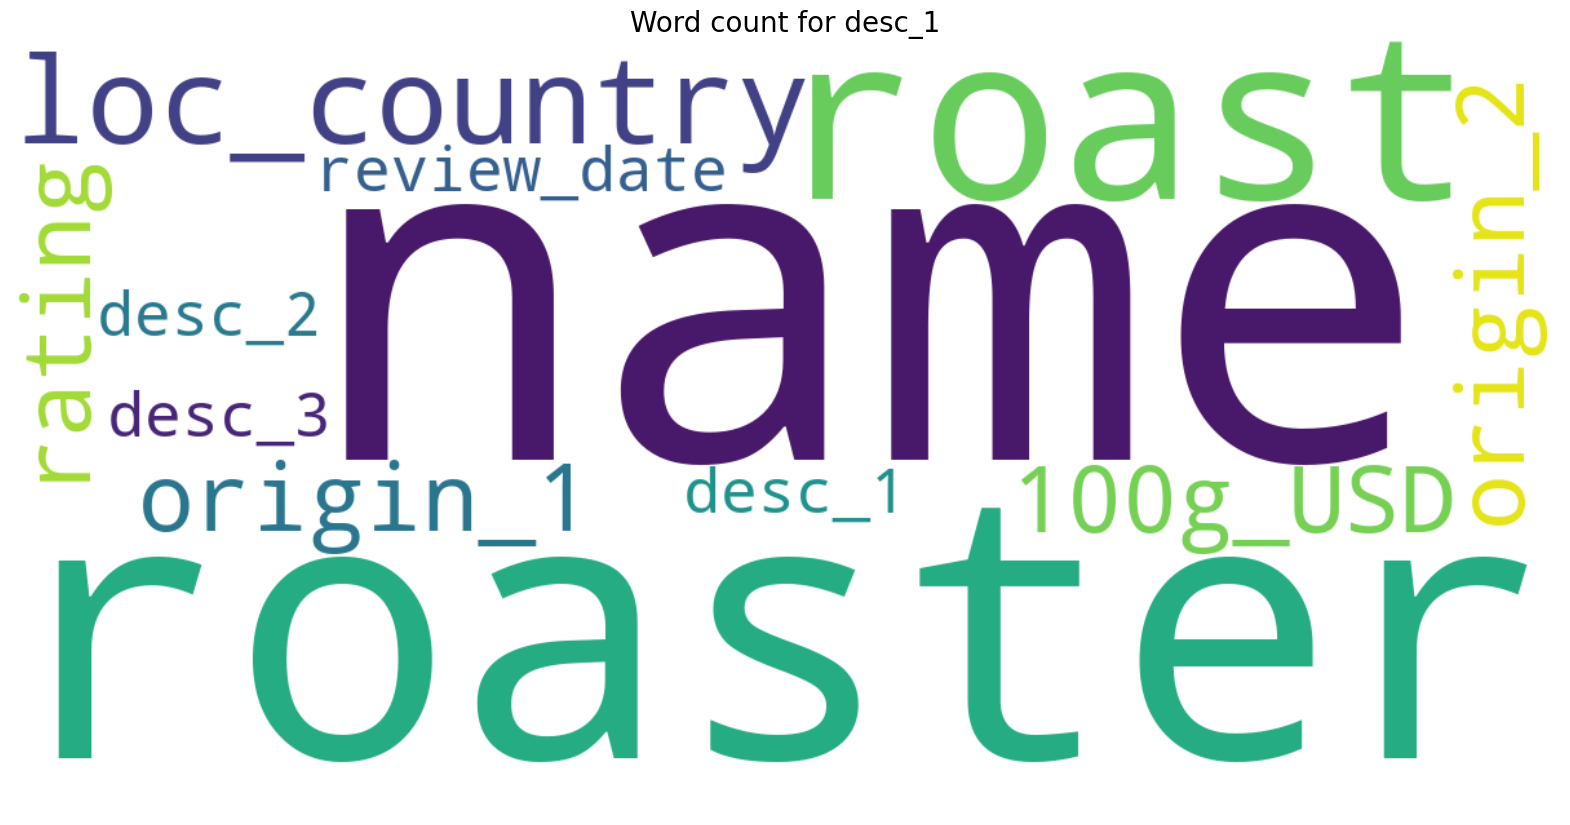

In [12]:
from wordcloud import WordCloud
desc_1= train[train.rating == 'desc_1']
desc_1_string = ' '.join(desc_1)
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1200,width = 1200, height=600,background_color= "white").generate(desc_1_string)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count for desc_1",fontsize=20)
plt.show()

# **EDA**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
content_types = train['roast'].value_counts()
content_types

Medium-Light    1490
Light            287
Medium           259
Medium-Dark       39
Dark               5
Name: roast, dtype: int64

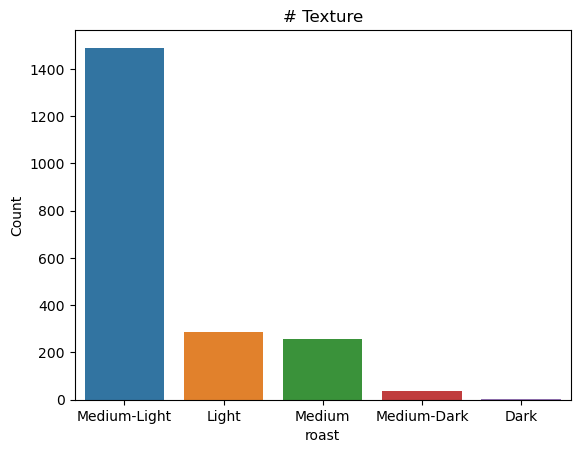

In [15]:
sns.barplot(x=content_types.index, y=content_types.values)  # Also you can use `sns.countplot`
plt.xlabel('roast')
plt.ylabel('Count')
plt.title('# Texture')
plt.savefig('Texture of coffee.pdf')
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

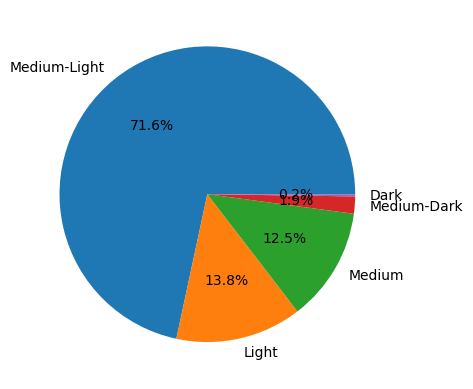

In [16]:
plt.pie(x=content_types.values,labels=content_types.index, autopct='%.1f%%')
plt.title

In [17]:
content_types = train['loc_country'].value_counts()
content_types

United States              1336
Taiwan                      554
Hawai'i                      87
Canada                       31
Guatemala                    29
Hong Kong                    20
Japan                        12
England                       7
China                         4
Malaysia                      3
Australia                     2
Mexico                        2
Peru                          2
Kenya                         1
Belgium                       1
Honduras                      1
United States And Floyd       1
Uganda                        1
New Taiwan                    1
Name: loc_country, dtype: int64

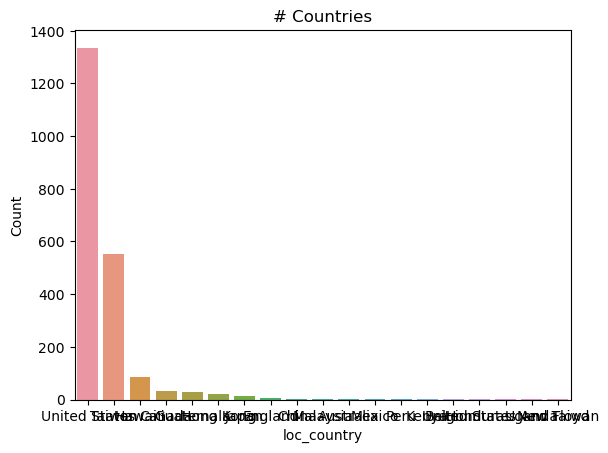

In [18]:
sns.barplot(x=content_types.index, y=content_types.values)  # Also you can use `sns.countplot`
plt.xlabel('loc_country')
plt.ylabel('Count')
plt.title('# Countries')
plt.savefig('Countries which prefer coffee.pdf')
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

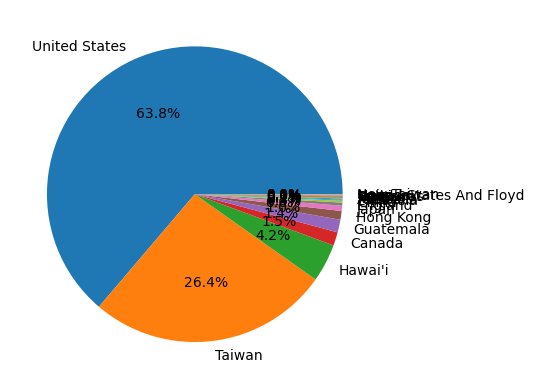

In [19]:
plt.pie(x=content_types.values,labels=content_types.index, autopct='%.1f%%')
plt.title

In [20]:
content_types = train['rating'].value_counts()
content_types

93    611
94    530
92    377
95    260
91    114
90     91
96     66
97     11
88     10
89      8
87      7
86      5
84      2
98      2
85      1
Name: rating, dtype: int64

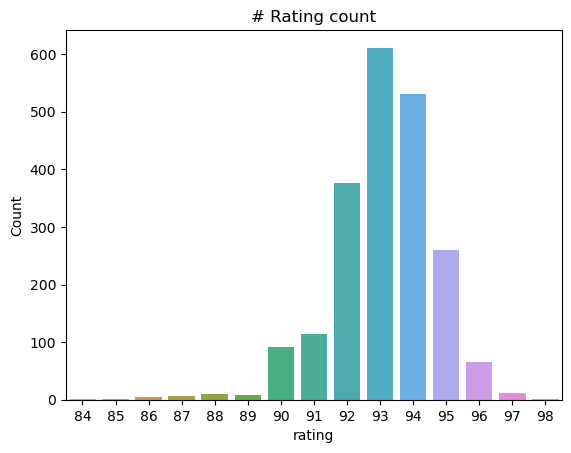

In [21]:
sns.barplot(x=content_types.index, y=content_types.values)  # Also you can use `sns.countplot`
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('# Rating count')
plt.savefig('Rating count of coffee.pdf')
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

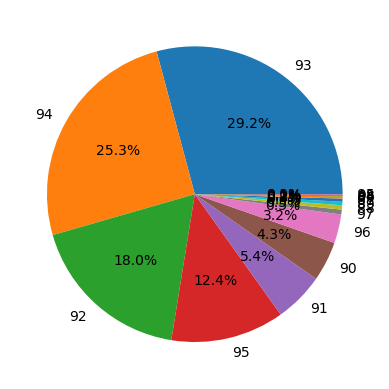

In [22]:
plt.pie(x=content_types.values,labels=content_types.index, autopct='%.1f%%')
plt.title

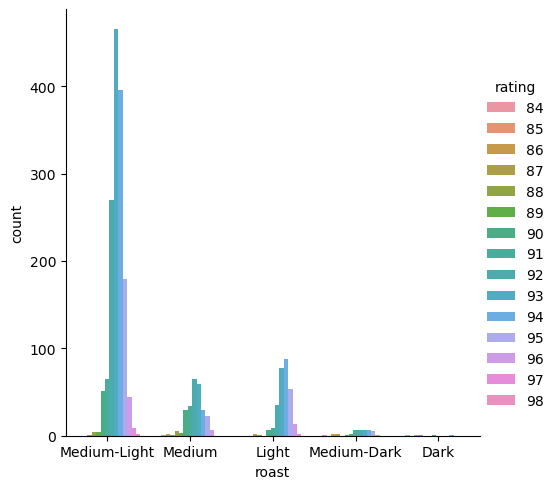

In [23]:
sns.catplot(x="roast",hue="rating",kind="count",data=train)

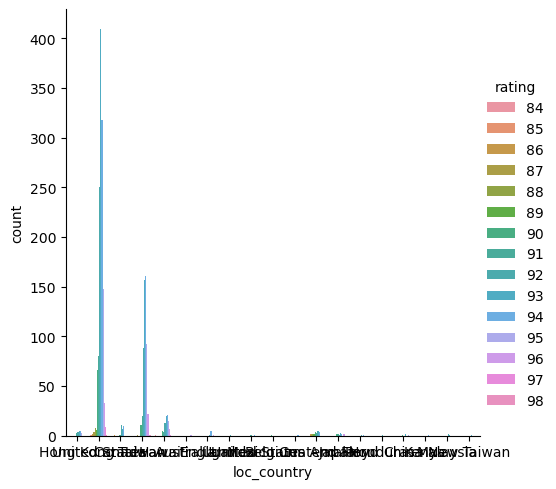

In [24]:
sns.catplot(x="loc_country",hue="rating",kind="count",data=train)

**Data Pre-processing**

**Null values**

In [25]:
train.nunique()

name           1909
roaster         424
roast             5
loc_country      19
origin_1        614
origin_2        357
100g_USD        473
rating           15
review_date      61
desc_1         2092
desc_2         2029
desc_3         2090
dtype: int64

In [26]:
train.isnull().sum()

name            0
roaster         0
roast          15
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
desc_1          0
desc_2          0
desc_3          2
dtype: int64

In [27]:
train=train.drop(['name', 'roaster', 'roast', 'loc_country', 'origin_1', 'origin_2',
       '100g_USD', 'review_date', 'desc_2', 'desc_3'],axis=1)

In [28]:
train.isnull().sum()

rating    0
desc_1    0
dtype: int64

In [29]:
train.head()

,rating,desc_1
0,95,"Evaluated as espresso. Sweet-toned, deeply ric..."
1,94,"Evaluated as espresso. Sweetly tart, floral-to..."
2,92,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
3,92,"Delicate, sweetly spice-toned. Pink peppercorn..."
4,94,"Deeply sweet, subtly pungent. Honey, pear, tan..."


In [30]:
test.columns

Index(['name', 'roaster', 'roast', 'loc_country', 'origin', '100g_USD',
       'rating', 'review_date', 'review'],
      dtype='object')

In [31]:
test = test.drop(['name', 'roaster', 'roast', 'loc_country','origin','100g_USD', 'review_date'],axis=1)

In [32]:
test.head()

,rating,review
0,92,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,92,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,94,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,93,"Delicate, richly and sweetly tart. Dried hibis..."
4,93,"High-toned, floral. Dried apricot, magnolia, a..."


**Reduction of Data**

**Here the shape of data is very less. So, No need to reduce the data.**

**Data Cleaning**

**Hashtags removal**

In [33]:
train['desc_1'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)
test['review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

**Mentions Removal**

In [34]:
train['desc_1'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)
test['review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

**URL Removal**

In [35]:
train['desc_1'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)
test['review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

**Stopwords Removal**

In [36]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [37]:
train['desc_1'] = train['desc_1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test['review'] = test['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

**Lowercase Removal**

In [38]:
train['desc_1']=train['desc_1'].str.lower()
test['review']=test['review'].str.lower()

**Stemming**

In [39]:
#import pandas as pd
#from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
##stemmer = SnowballStemmer("english")
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence


In [40]:
train["desc_1"] = train["desc_1"].apply(stem_sentence)
test["review"] = test["review"].apply(stem_sentence)

**Punctuations Removal**

In [41]:
def punctuations_removal(text):
    puntuations = "[\.\?!,;:]+"
    text = re.sub(puntuations,"",text)
    return text



In [42]:
train['desc_1'] = train['desc_1'].apply(lambda x: punctuations_removal(x))
test['review'] = test['review'].apply(lambda x: punctuations_removal(x))

In [43]:
train.head()

,rating,desc_1
0,95,evalu espresso sweet-ton deepli rich chocol...
1,94,evalu espresso sweetli tart floral-ton hone...
2,92,crispli sweet cocoa-ton lemon blossom roast...
3,92,delic sweetli spice-ton pink peppercorn dat...
4,94,deepli sweet subtli pungent honey pear tan...


In [44]:
test.head()

,rating,review
0,92,crispli sweet cocoa-ton lemon blossom roast...
1,92,delic sweetli spice-ton pink peppercorn dat...
2,94,deepli sweet subtli pungent honey pear tan...
3,93,delic richli sweetli tart dri hibiscu fine ...
4,93,high-ton floral dri apricot magnolia almon...


In [45]:
train.shape

(2095, 2)

In [46]:
 test.shape

(1246, 2)

**same EDA graphs after reduction of dataset**

**EDA for final dataset**

In [47]:
train['rating'].value_counts()

93    611
94    530
92    377
95    260
91    114
90     91
96     66
97     11
88     10
89      8
87      7
86      5
84      2
98      2
85      1
Name: rating, dtype: int64

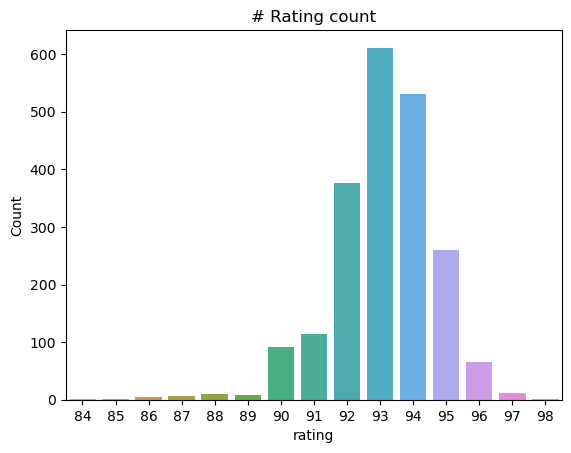

In [48]:
sns.barplot(x=content_types.index, y=content_types.values)  # Also you can use `sns.countplot`
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('# Rating count')
plt.savefig('Rating count of coffee.pdf')
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

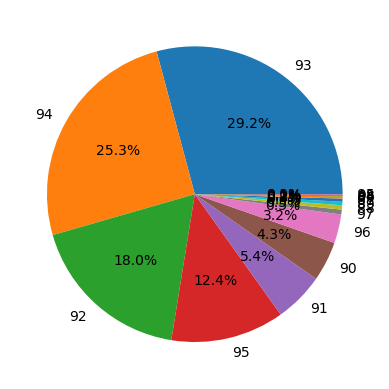

In [49]:
plt.pie(x=content_types.values,labels=content_types.index, autopct='%.1f%%')
plt.title

In [50]:
train['rating'].value_counts()

93    611
94    530
92    377
95    260
91    114
90     91
96     66
97     11
88     10
89      8
87      7
86      5
84      2
98      2
85      1
Name: rating, dtype: int64

In [51]:
y = train['rating']
x = train['desc_1']

In [52]:
x.shape

(2095,)

**Vectorization**

**TF-IDF**

In [53]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [54]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out ()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)

In [55]:
x

0       evalu espresso  sweet-ton  deepli rich  chocol...
1       evalu espresso  sweetli tart  floral-ton  hone...
2       crispli sweet  cocoa-ton  lemon blossom  roast...
3       delic  sweetli spice-ton  pink peppercorn  dat...
4       deepli sweet  subtli pungent  honey  pear  tan...
                              ...                        
2090    crispli sweet  nut-ton  almond brittl  pie che...
2091    chocolati  floral-fram  cocoa nib  honeysuckl ...
2092    high-ton  enticingli sweet  black cherri  narc...
2093    vibrantli sweet  subtli nuanc  apricot  dark c...
2094    evalu espresso  multi-lay  complex  dark choco...
Name: desc_1, Length: 2095, dtype: object

In [56]:
y

0       95
1       94
2       92
3       92
4       94
        ..
2090    92
2091    93
2092    93
2093    93
2094    94
Name: rating, Length: 2095, dtype: int64

In [57]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [58]:
X_temp.shape, X_test.shape, y_temp.shape, y_test.shape

((1676, 1000), (419, 1000), (1676,), (419,))

**Model Selection**

In [59]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
accuracy = {'TF-IDF':[]}

**Logistic Regression**

In [62]:
#TF-IDF
regressor_LR_tf =LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)


print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  8  5  1  0  0  0  0]
 [ 0  0  0  0  1  1 11  7  1  0  0  0  0]
 [ 0  0  0  0  0  0 37 39  6  1  0  0  0]
 [ 0  0  0  0  0  1 11 82 28  1  0  0  0]
 [ 0  0  0  0  0  0  1 36 64  9  0  0  0]
 [ 0  0  0  0  0  0  1  5 21 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         2
          88       0.00      0.00      0.00         5
          89       0.00      0.00      0.00         2
          90       0.33      0.07      0.11        15
          91       0.25      0.05      0.08        21
          92       0.49      0.45      0.47        83
          93       0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Desicion Tree**

In [63]:
#TF-IDF
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 75  3  5  0  0  0]
 [ 0  0  0  0  0  0  0 87 23 13  0  0  0]
 [ 0  0  0  0  0  0  0 57 47  6  0  0  0]
 [ 0  0  0  0  0  0  0 13 17  9  0  0  0]
 [ 0  0  0  0  0  0  0  3  5  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]]
              precision    recall  f1-score   support

          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         2
          88       0.00      0.00      0.00         5
          89       0.00      0.00      0.00         2
          90       0.00      0.00      0.00        15
          91       0.00      0.00      0.00        21
          92       0.00      0.00      0.00        83
          93       0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Gradient Boosting**

In [64]:
#TF-IDF
model_GB_tf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100,subsample=1.0) 
model_GB_tf.fit(X_temp, y_temp)
y_predict_GB_tf = model_GB_tf.predict(X_test)
a=(model_GB_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_tf))
print(metrics.classification_report(y_test, y_predict_GB_tf))
print(metrics.accuracy_score(y_test, y_predict_GB_tf))

[[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  1  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  5  6  1  0  0  0  0]
 [ 0  0  0  0  0  2  2  8  7  2  0  0  0  0]
 [ 0  0  0  0  0  1  1 28 44  7  2  0  0  0]
 [ 0  0  0  0  0  3  0 12 77 23  5  3  0  0]
 [ 0  1  0  0  0  2  1  1 28 65  8  3  0  1]
 [ 0  0  0  0  1  0  0  0  9 11 15  3  0  0]
 [ 0  0  0  0  0  0  0  0  1  5  8  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

          84       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         2
          88       1.00      0.20      0.33         5
          89       0.00      0.00      0.00         2
          90       0.08      0.07      0.07 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

**Random Forest**

In [65]:
#TF-IDF
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  1  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  7 12  2  0  0  0  0]
 [ 0  0  0  0  0  0 31 44  7  1  0  0  0]
 [ 0  0  0  0  0  0 14 86 23  0  0  0  0]
 [ 0  0  0  0  0  0  0 38 69  3  0  0  0]
 [ 0  0  0  0  0  0  0 10 19 10  0  0  0]
 [ 0  0  0  0  0  0  0  1  8  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         2
          88       0.00      0.00      0.00         5
          89       0.00      0.00      0.00         2
          90       0.00      0.00      0.00        15
          91       0.00      0.00      0.00        21
          92       0.48      0.37      0.42        83
          93       0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**K Nearest Neighbours**

In [66]:
#TF-IDF
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  1  2  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1 10  2  1  0  0  0  0]
 [ 0  0  0  0  0  5  4  6  6  0  0  0  0  0]
 [ 0  1  0  0  0  7  6 32 33  4  0  0  0  0]
 [ 0  0  0  0  1  1  3 29 60 27  2  0  0  0]
 [ 0  0  0  0  0  2  0  7 43 53  5  0  0  0]
 [ 0  0  0  0  0  0  0  4 10 14 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  7  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

          84       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         2
          88       1.00      0.20      0.33         5
          89       0.00      0.00      0.00         2
          90       0.06      0.07      0.06 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [67]:
TF_IDF = accuracy['TF-IDF']

In [68]:
 accuracy['TF-IDF']

[0.4701670644391408,
 0.3412887828162291,
 0.45346062052505964,
 0.4677804295942721,
 0.38663484486873506]

**Evaluation**

In [69]:
model = ['LR','DT','GB','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LR,0.470167
1,DT,0.341289
2,GB,0.453461
3,RF,0.467780
4,KN,0.386635


In [70]:
compare_models["accuracy"].tolist()

[0.4701670644391408,
 0.3412887828162291,
 0.45346062052505964,
 0.4677804295942721,
 0.38663484486873506]

**Plotting Graphs of accuracies by applying TF-IDF vectorization**

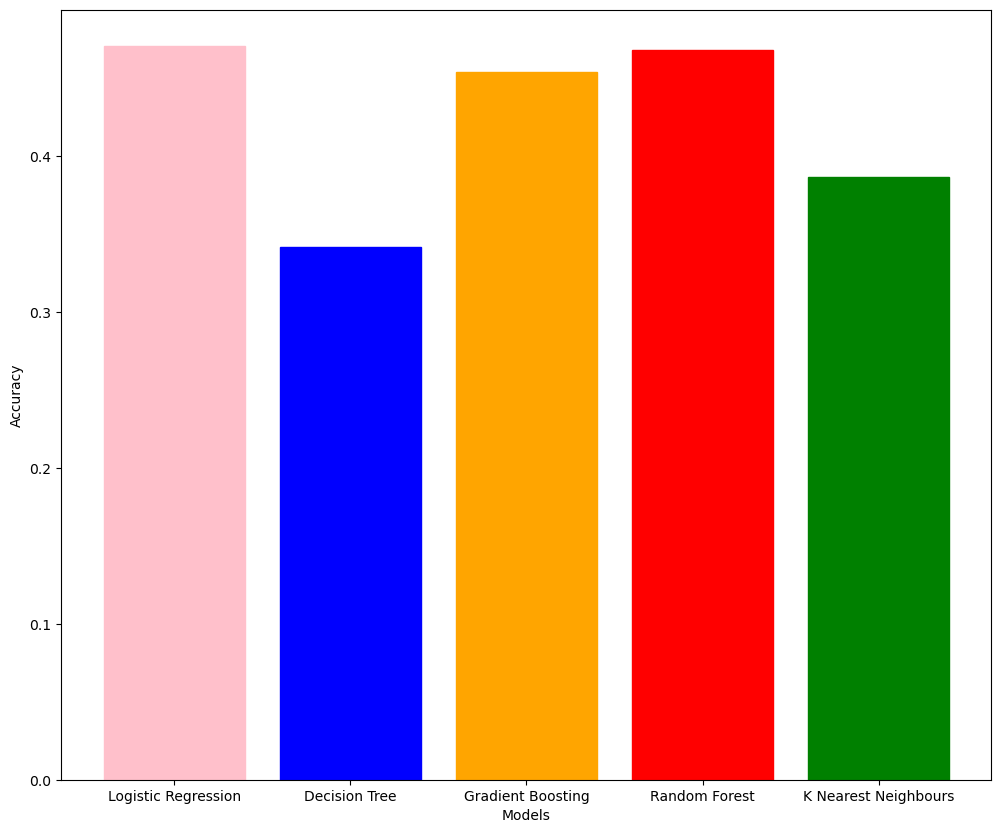

In [71]:
names=['Logistic Regression', 'Decision Tree' ,'Gradient Boosting','Random Forest','K Nearest Neighbours']
acc=compare_models["accuracy"].tolist()
plt.figure(figsize=(12,10))
graph = plt.bar(names,acc)
plt.xlabel('Models')
plt.ylabel('Accuracy')
graph[0].set_color('pink')
graph[1].set_color('blue')
graph[2].set_color('orange')
graph[3].set_color('red')
graph[4].set_color('green')

**Hyperparameter Tuning**

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

**logistic regression**

In [73]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
log = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [74]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best accuracy:  0.4468923240938166


In [75]:
y_pred_log_ht = grid_search.predict(X_test)

**Desicion tree**

In [76]:
param_grid = {
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5]})

In [77]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.3771073205401564


In [78]:
y_pred_dt_ht = grid_search.predict(X_test)

**Gradient Boosting**

In [79]:
param_grid = {
    'n_estimators':[50],
    'max_depth': [3, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5], 'n_estimators': [50]})

In [80]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)




Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.41945628997867807


In [81]:

y_pred_gb_ht = grid_search.predict(X_test)


**Random Forest**

In [82]:

param_grid = {
    'n_estimators': [50],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5], 'n_estimators': [50]})

In [83]:

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)



Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.3794687277896234


In [84]:

y_pred_rf_ht = grid_search.predict(X_test)


**K Nearest Neighbour**

In [85]:

param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [86]:

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Best hyperparameters:  {'n_neighbors': 5, 'weights': 'distance'}
Best accuracy:  0.36453802416488984


In [87]:

y_pred_knn_ht = grid_search.predict(X_test)


**Accuracies after Hyperparameter Tuning**

In [88]:

log_reg_acc_ht=accuracy_score(y_test,y_pred_log_ht)
dt_acc_ht=accuracy_score(y_test,y_pred_dt_ht)
gb_acc_ht=accuracy_score(y_test,y_pred_gb_ht)
rf_acc_ht=accuracy_score(y_test,y_pred_rf_ht)
knn_acc_ht=accuracy_score(y_test,y_pred_knn_ht)


**Plotting of Graphs of Accuracies after Hypertuning**

****

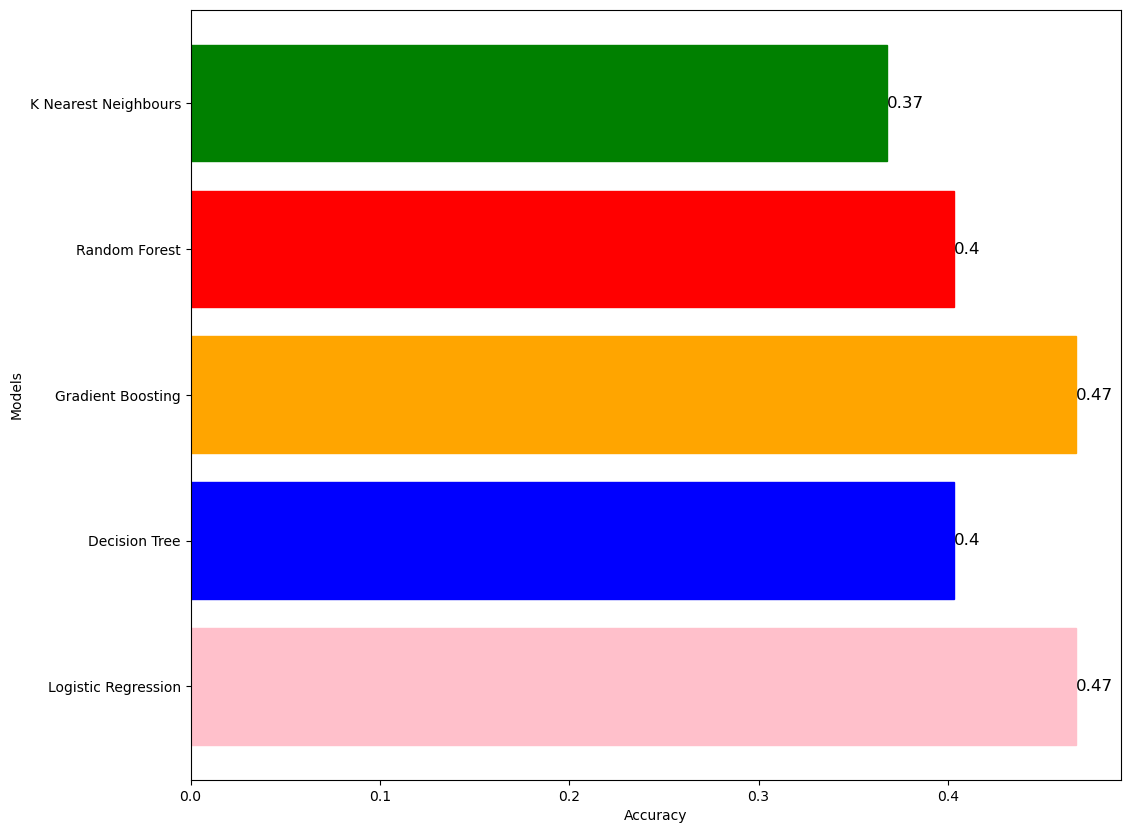

In [89]:

model=['Logistic Regression', 'Decision Tree' ,'Gradient Boosting','Random Forest','K Nearest Neighbours']
acc=[log_reg_acc_ht,dt_acc_ht,gb_acc_ht,rf_acc_ht,knn_acc_ht]
plt.figure(figsize=(12,10))
graph = plt.barh(model,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')
graph[2].set_color('orange')
graph[3].set_color('red')
graph[4].set_color('green')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

**Bag of Words****

**vectorizing**

In [90]:
import re
from nltk.corpus import stopwords

# Create a stopwords set adding some personal 'words'
stopwords_english = set(stopwords.words('english'))
my_stopwords = set(["http", "'s", "n't", "'m", "'re", "'ve"])
stopwords_english.update(my_stopwords)

def preprocess_review(text):
    # Convert to lower case
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Split text into tokens
    tokens = text.split()

    # Filter tokens
    clean_tokens = [tok for tok in tokens if tok not in stopwords_english and len(tok) > 1]

    # Join tokens into a string
    clean_text = ' '.join(clean_tokens)

    return clean_text


In [91]:
train=pd.read_csv('/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv')

In [92]:
%%time

# Preprocess training data adding new column
train["clean_text"] = train["desc_1"].apply(preprocess_review)

CPU times: user 54.7 ms, sys: 980 µs, total: 55.7 ms
Wall time: 55.8 ms


In [93]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [94]:
vectorizer_train = CountVectorizer(max_features=1000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names_out())

**Building ML model**

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = train['clean_text']
y =train['rating']
accuracy = {'BoW':[]}
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)
lgr_acc = accuracy_score(y_test, lgr_preds)
accuracy['BoW'].append(lgr_acc)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
accuracy['BoW'].append(dt_acc)

Gb =  GradientBoostingClassifier()
Gb.fit(X_train, y_train)
Gb_preds = Gb.predict(X_test)
Gb_acc = accuracy_score(y_test, Gb_preds.round())
accuracy['BoW'].append(Gb_acc)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
accuracy['BoW'].append(rf_acc)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
accuracy['BoW'].append(knn_acc)


print(f"Logistic Regression Accuracy: {lgr_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Gradient Boosting Accuracy: {Gb_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.39856801909307876
Decision Tree Accuracy: 0.37708830548926014
Gradient Boosting Accuracy: 0.441527446300716
Random Forest Accuracy: 0.47255369928400953
KNN Accuracy: 0.3221957040572792


**Evaluation**

In [96]:
model = ['lgr','dt','Gb','rf','knn']
data = {'model':model,'accuracy':accuracy['BoW']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,lgr,0.398568
1,dt,0.377088
2,Gb,0.441527
3,rf,0.472554
4,knn,0.322196


In [97]:
compare_models["accuracy"].tolist()

[0.39856801909307876,
 0.37708830548926014,
 0.441527446300716,
 0.47255369928400953,
 0.3221957040572792]

**Plotting graps of accuracies by applying Bag of Words vectorization**

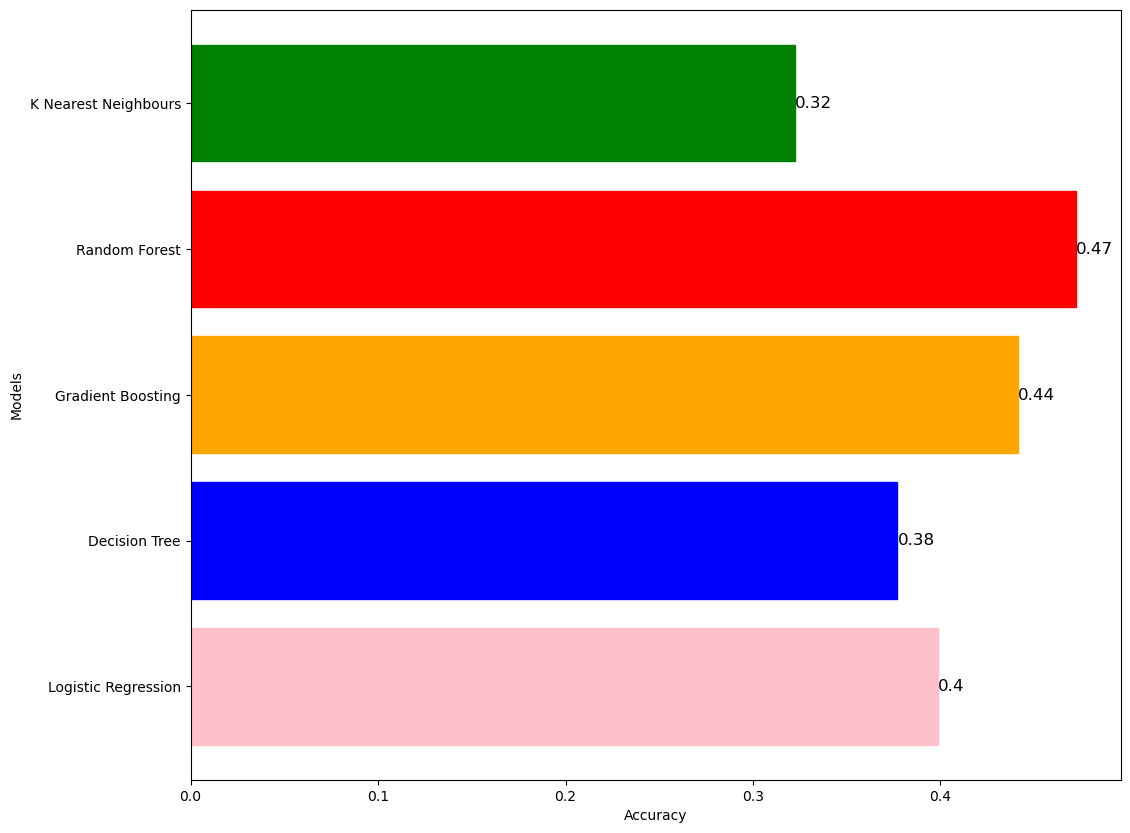

In [98]:
names=['Logistic Regression', 'Decision Tree' ,'Gradient Boosting','Random Forest','K Nearest Neighbours']
acc=compare_models["accuracy"].tolist()
plt.figure(figsize=(12,10))
graph = plt.barh(names,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')
graph[2].set_color('orange')
graph[3].set_color('red')
graph[4].set_color('green')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

**Hyperparameter Tuning**

**Logistic Regression**

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
X = train['clean_text']
y = train['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

lr_gs = GridSearchCV(LogisticRegression(), param_grid, cv=5)
lr_gs.fit(X_train_vec, y_train)
accuracy_lr_gs=lr_gs.score(X_test_vec, y_test)
print(f"Tuned Accuracy for lr: {accuracy_lr_gs}")
accuracy['BoW'].append(accuracy_lr_gs)

Tuned Accuracy for lr: 0.43914081145584727


**decision tree**

In [101]:
X = train['clean_text']
y = train['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dtc_gs = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dtc_gs.fit(X_train_vec, y_train)
accuracy_dtc_gs=dtc_gs.score(X_test_vec, y_test)
print(f"Tuned Accuracy for dtc: {accuracy_dtc_gs}")
accuracy['BoW'].append(accuracy_dtc_gs)

Tuned Accuracy for dtc: 0.3937947494033413


**Gradient Boosting**

In [102]:
from sklearn.ensemble import RandomForestClassifier
X = train['clean_text']
y = train['rating']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


print('Best Hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy_rf_cv = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy_rf_cv*100))
accuracy['BoW'].append(accuracy_rf_cv)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 39.38%


**Random Forest**

In [103]:
from sklearn.ensemble import RandomForestClassifier
X = train['clean_text']
y = train['rating']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


print('Best Hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy_rf_cv = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy_rf_cv*100))
accuracy['BoW'].append(accuracy_rf_cv)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 41.77%


**K Nearest Neighbours**

In [104]:
from sklearn.neighbors import KNeighborsClassifier
X = train['clean_text']
y = train['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

param_grid = {'n_neighbors': [5, 10, 15, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30],
              'p': [1, 2]}

knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gs.fit(X_train_vec, y_train)

accuracy_knn_gs = knn_gs.score(X_test_vec, y_test)
print(f"Tuned Accuracy: {accuracy_knn_gs}")
accuracy['BoW'].append(accuracy_knn_gs)

Tuned Accuracy: 0.3914081145584726


In [105]:
BoW=accuracy['BoW']

In [106]:
accuracy['BoW']

[0.39856801909307876,
 0.37708830548926014,
 0.441527446300716,
 0.47255369928400953,
 0.3221957040572792,
 0.43914081145584727,
 0.3937947494033413,
 0.3937947494033413,
 0.41766109785202865,
 0.3914081145584726]

**Plotting of Graphs of Accuracies after Hypertuning**

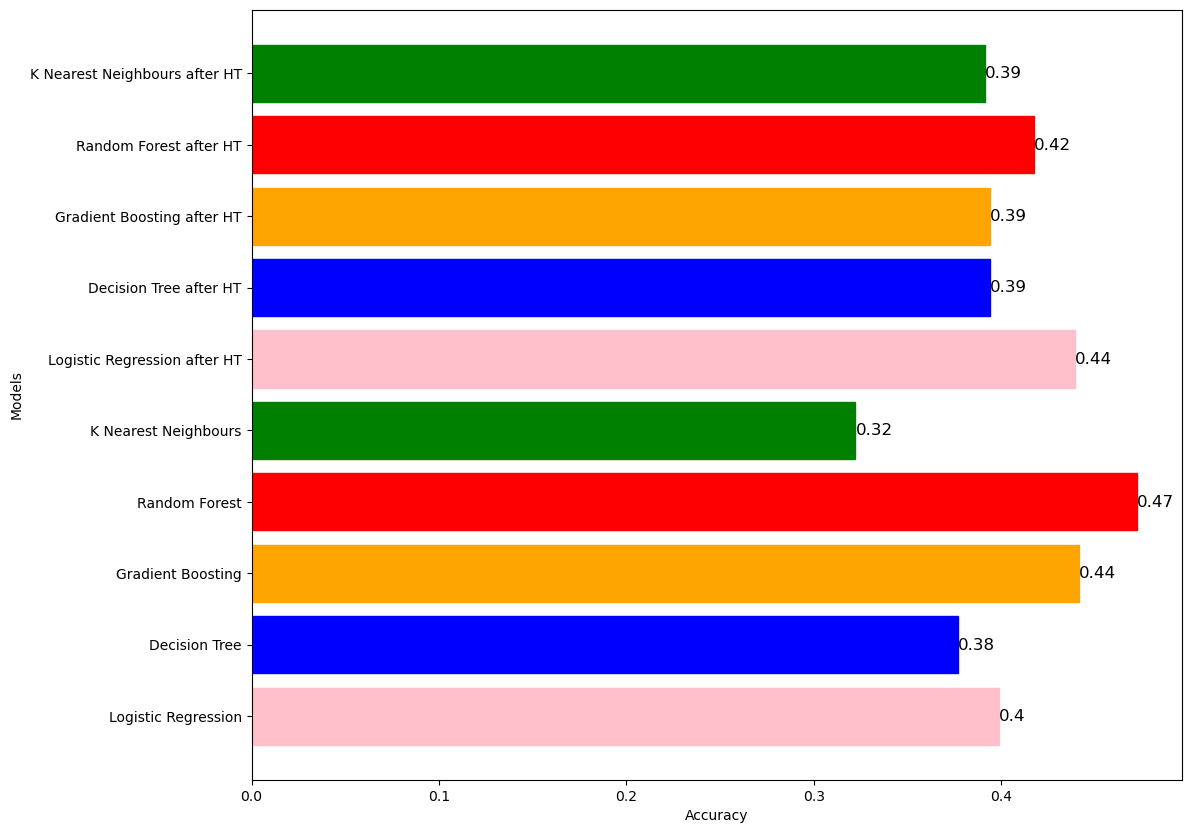

In [107]:
names=['Logistic Regression', 'Decision Tree' ,'Gradient Boosting','Random Forest','K Nearest Neighbours','Logistic Regression after HT', 'Decision Tree after HT' ,'Gradient Boosting after HT','Random Forest after HT','K Nearest Neighbours after HT']
acc=BoW
plt.figure(figsize=(12,10))
graph = plt.barh(names,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')
graph[2].set_color('orange')
graph[3].set_color('red')
graph[4].set_color('green')
graph[5].set_color('pink')
graph[6].set_color('blue')
graph[7].set_color('orange')
graph[8].set_color('red')
graph[9].set_color('green')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

**Conclusion and Future Scope**

We can conclude that Logisctic Regession and Random Forest works best for our dataset after hyper parameter tuning. And, before that,We can conclude that  Gradient Boosting  and Random Forest works best for our dataset